In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [3]:
job_params = {
    'subjects_dir' :   '/mnt/zinu-data/ALI-NY/ALI-A3',
    'subject' :        'AH009',
    'date' :           '2022-04-04',
    'expnum' :         [2,3],
    'planes' :         n.arange(0,30),
    
    'notch_filt' :      {'f0' : 200, 'Q' : 5},
    
    'n_init_files' :   3,
    'init_file_pool' : None,
    'init_file_sample_method': 'random',
    
    'subtract_crosstalk' : True,
    'override_crosstalk' : None,
    'crosstalk_n_planes' : 10, 
    
    'nonrigid' : True,
    'smooth_sigma' : 1.15,
    'maxregshift' : 0.15,
    'reg_filter_pcorr' : 1,
    'generate_sample_registered_bins' : False,

    'dtype' : n.float32,
    'tif_batch_size' : 1,
}



In [4]:
tifs, si_params, exp_str = flu.find_exp(job_params['subjects_dir'], job_params['subject'],
                                        job_params['date'], job_params['expnum'])

In [6]:
job_params['fs'] = si_params['vol_rate']
job_params['fs'] = si_params['vol_rate']
job_params['notch_filt']['line_freq'] = si_params['line_freq']

In [7]:
# Create the job
job = Job('/mnt/md0/runs',exp_str, tifs = tifs,
          params=job_params, create=True, overwrite=True, verbosity = 3)

Loading job directory for AH009_2022-04-04_2-3 in /mnt/md0/runs
      Created dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data
      Created dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/summary
      Created dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/iters
   Loading default params
      Updating param subjects_dir
      Updating param subject
      Updating param date
      Updating param expnum
      Updating param planes
      Updating param notch_filt
      Updating param n_init_files
      Updating param init_file_pool
      Updating param init_file_sample_method
      Updating param subtract_crosstalk
      Updating param override_crosstalk
      Updating param crosstalk_n_planes
      Updating param nonrigid
      Updating param smooth_sigma
      Updating param maxregshift
      Updating param reg_filter_pcorr
      Updating param generate_sample_registered_bins
      Updating param dtype
      Updating param tif_batch_size
      Updating param fs
   Updated main 

In [8]:
tifs_nofilt = lbmio.load_and_stitch_tifs(job.tifs[:2], planes = n.arange(10),filt=None)
tifs_filt = lbmio.load_and_stitch_tifs(job.tifs[:2], planes=n.arange(10), filt = job_params['notch_filt'])

Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/2/AH009_ROI3p33um_-420um_00001_00001.tif
Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/2/AH009_ROI3p33um_-420um_00001_00002.tif
Loaded 2 files, total 4.54 GB
Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/2/AH009_ROI3p33um_-420um_00001_00001.tif
Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/2/AH009_ROI3p33um_-420um_00001_00002.tif
Loaded 2 files, total 4.54 GB


In [9]:
v = napari.view_image(tifs_nofilt, name='no filt')
v.add_image(tifs_filt, name='filt')

<Image layer 'filt' at 0x7f3a17b349d0>

In [10]:
# optional parameters for initialization
# load 1 file to initialize, and select 200 frames randomly to do initalization on
job.params['n_init_files'] = 3
job.params['init_n_frames'] = None


   Saved a copy of params at /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/summary/summary.npy
   Loading init tifs
Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/2/AH009_ROI3p33um_-420um_00001_00013.tif
Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/3/AH009_ROI3p33um_-420um_00001_00017.tif
Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/2/AH009_ROI3p33um_-420um_00001_00016.tif
Loaded 3 files, total 20.45 GB
   Loaded init tifs
   Loaded movie with 300 frames and shape 30, 1202, 1015
         Enforcing positivity in mean image


/home/ali/packages/s2p-lbm/suite3d/utils.py:197: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving figure to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/summary/crosstalk_plots
saved
Close figure


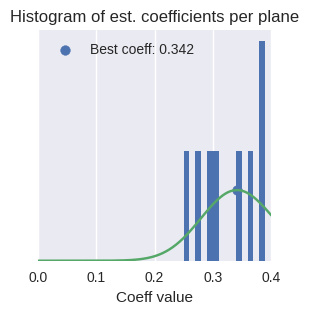

   Subtracting with estimated coefficient 0.342
         Subtracting plane 0 from 15
         Subtracting plane 1 from 16
         Subtracting plane 2 from 17
         Subtracting plane 3 from 18
         Subtracting plane 4 from 19
         Subtracting plane 5 from 20
         Subtracting plane 6 from 21
         Subtracting plane 7 from 22
         Subtracting plane 8 from 23
         Subtracting plane 9 from 24
         Subtracting plane 10 from 25
         Subtracting plane 11 from 26
         Subtracting plane 12 from 27
         Subtracting plane 13 from 28
         Subtracting plane 14 from 29
   Estimating fusing shifts
   Using best fuse shift of 12
   Building ops file
   Saved init mov to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/summary/init_mov.npy
   Aligning planes
float64
8
      Fixing 0 plane alignment outliers
   Fusing and padding init mov
Setting smooth_sigma: 1.15
Setting maxregshift: 0.15
Setting Ly: 1222
Setting Lx: 988
Setting nonrigid: True
   Computing reference

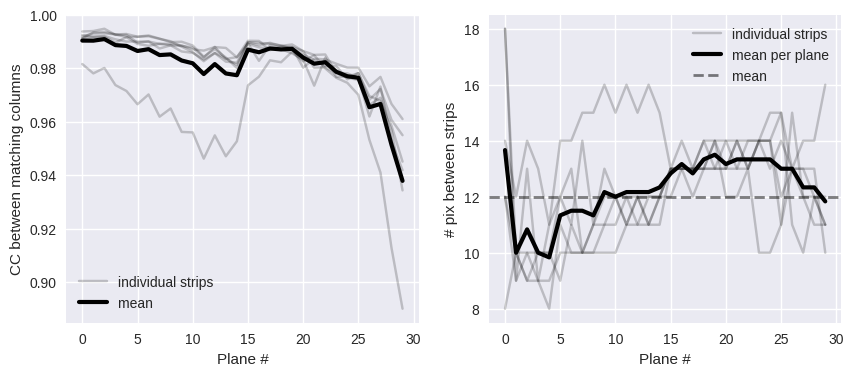

In [11]:
%%time
summary = job.run_init_pass()

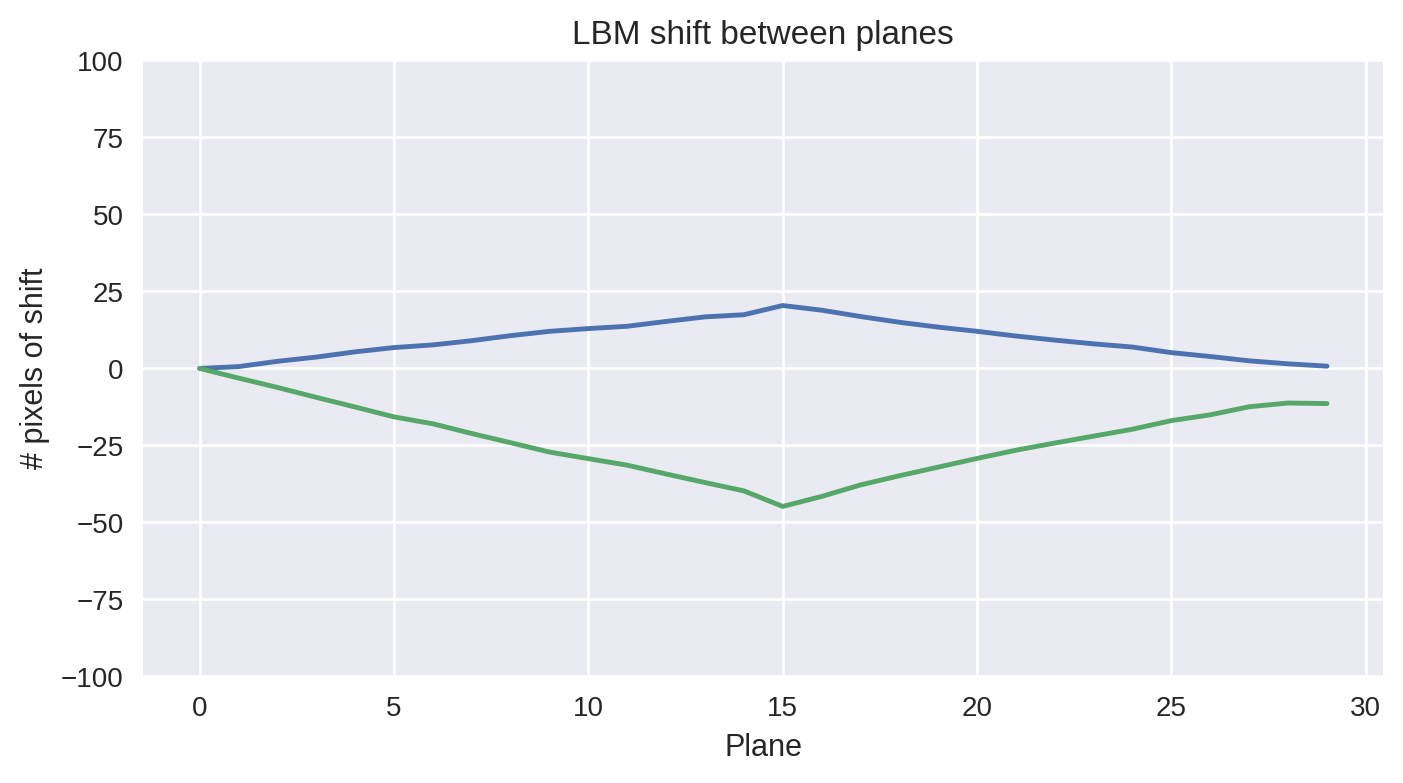

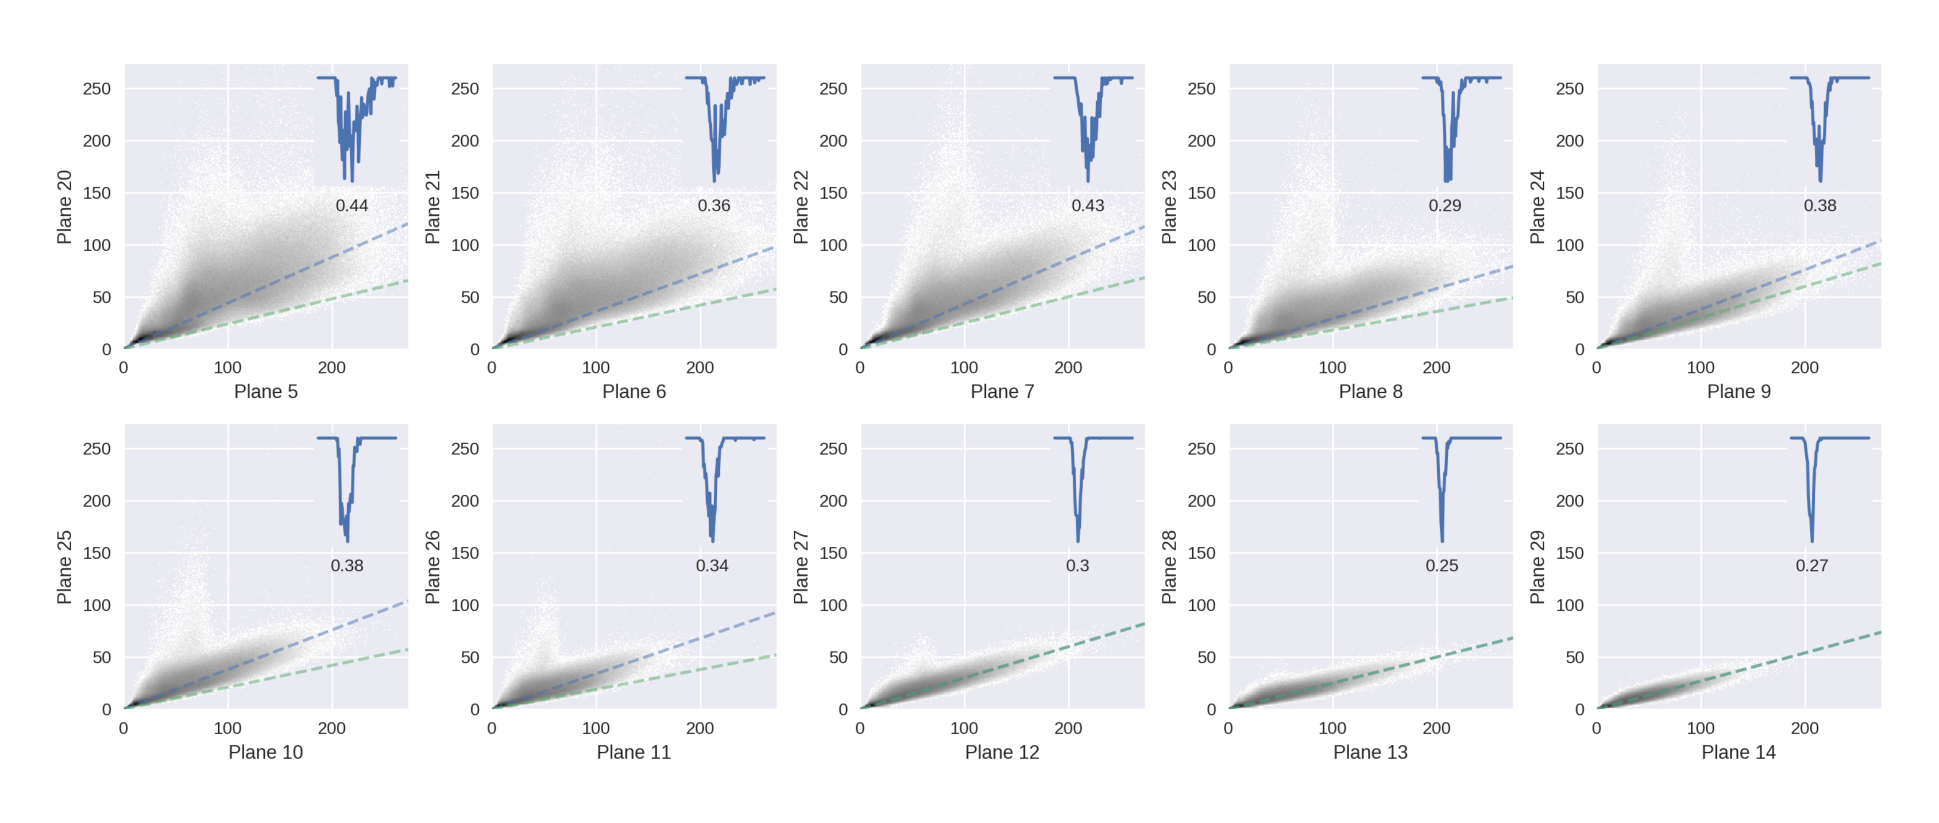

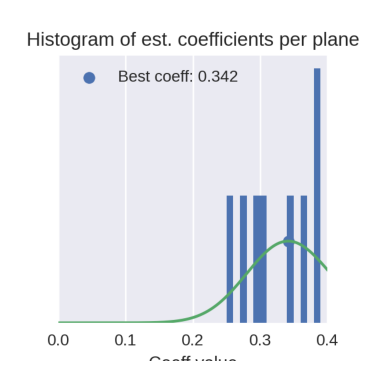

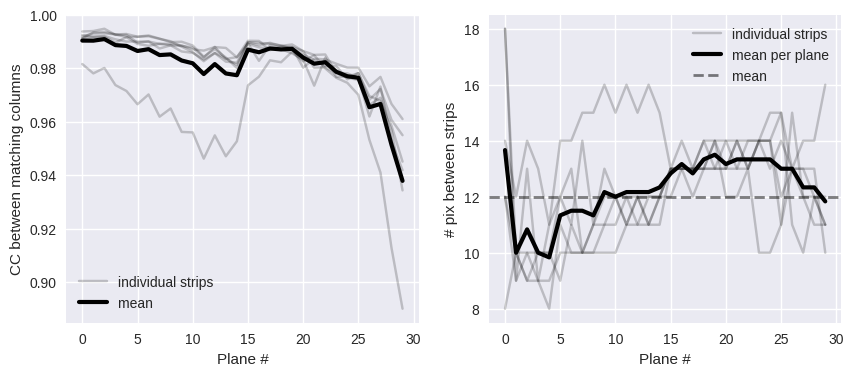

In [12]:
job.show_summary_plots()

In [13]:
summary = job.load_summary()

In [14]:
# split the large tiffs into files of size 100 after registration
job.params['split_tif_size'] = 100

In [15]:
%%time
job.register_gpu()

      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data with tag registered_fused_data
Will analyze 44 tifs in 44 batches
   Enforcing positivity
   Launching IO thread
         Memory at batch 0.  Total Used: 053.821 GB, Virtual Available: 449.885 GB, Virtual Used: 053.311 GB, Swap Used: 000.510 GB
Loading Batch 0 of 43
      Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/2/AH009_ROI3p33um_-420um_00001_00001.tif


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 6.82 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 104.986 GB, Virtual Available: 398.720 GB, Virtual Used: 104.476 GB, Swap Used: 000.510 GB
         Memory after movie copied from threadTotal Used: 116.253 GB, Virtual Available: 387.453 GB, Virtual Used: 115.743 GB, Swap Used: 000.510 GB
         Memory after thread memory clearedTotal Used: 109.418 GB, Virtual Available: 394.288 GB, Virtual Used: 108.908 GB, Swap Used: 000.510 GB
   Launching IO thread for next batch
      Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/2/AH009_ROI3p33um_-420um_00001_00002.tif
         After IO thread launch:Total Used: 109.418 GB, Virtual Available: 394.288 GB, Virtual Used: 108.908 GB, Swap Used: 000.510 GB
      Loaded batch of size (30, 100, 1202, 1015)
      Sending frames 0-10 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 1.48 sec
         Subtracting min pix vals to enforce positivity
       

   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 3.36 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 13.20 sec
         After GPU Batch:    Total Used: 172.559 GB, Virtual Available: 331.149 GB, Virtual Used: 172.047 GB, Swap Used: 000.511 GB
      Sending frames 70-80 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.71 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.59 sec
         Allocated GPU array for non-rigid reg in 0.27 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2.

         Loaded mov and masks to GPU for rigid reg in 1.03 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.77 sec
         Allocated GPU array for non-rigid reg in 0.21 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2.34 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.58 sec
         After GPU Batch:    Total Used: 160.767 GB, Virtual Available: 342.940 GB, Virtual Used: 160.255

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 9.19 sec
         After GPU Batch:    Total Used: 135.741 GB, Virtual Available: 367.967 GB, Virtual Used: 135.229 GB, Swap Used: 000.511 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.77 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.50 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2.

         Loaded mov and masks to GPU for rigid reg in 0.49 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.20 sec
         Allocated GPU array for non-rigid reg in 0.21 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.77 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.52 sec
         After GPU Batch:    Total Used: 109.444 GB, Virtual Available: 394.263 GB, Virtual Used: 108.933

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 13.35 sec
         After GPU Batch:    Total Used: 136.852 GB, Virtual Available: 366.855 GB, Virtual Used: 136.341 GB, Swap Used: 000.511 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.67 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.48 sec
         Allocated GPU array for non-rigid reg in 0.30 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2

         Loaded mov and masks to GPU for rigid reg in 0.54 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.26 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.83 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.71 sec
         After GPU Batch:    Total Used: 151.862 GB, Virtual Available: 351.844 GB, Virtual Used: 151.352

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 11.66 sec
         After GPU Batch:    Total Used: 178.542 GB, Virtual Available: 325.165 GB, Virtual Used: 178.031 GB, Swap Used: 000.511 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 3.33 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 4.19 sec
         Allocated GPU array for non-rigid reg in 0.24 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.01 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 4

         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.23 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.80 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.57 sec
         After GPU Batch:    Total Used: 100.201 GB, Virtual Available: 403.506 GB, Virtual Used: 099.690

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 9.99 sec
         After GPU Batch:    Total Used: 156.665 GB, Virtual Available: 347.042 GB, Virtual Used: 156.154 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 156.710 GB, Virtual Available: 346.997 GB, Virtual Used: 156.199 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0004.npy
         Saved in 6.41 sec
         After full batch saving:Total Used: 096.704 GB, Virtual Available: 407.002 GB, Virtual Used: 096.193 GB, Swap Used: 000.511 GB
         Memory at batch 5.  Total Used: 096.708 GB, Virtual Available: 406.999 GB, Virtual Used: 096.197 GB, Swap Used: 000.511 GB
Loading Batch 5 of 43
   Loaded 1 files, total 6.82 GB
   Batch 5 IO thread joined
         Memory after IO thread joinTotal Used: 101.903 GB, Virtual Available: 401.803 GB, Virtual Used

         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.22 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.78 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.48 sec
         After GPU Batch:    Total Used: 142.782 GB, Virtual Available: 360.924 GB, Virtual Used: 142.272

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 1.17 sec
         Shifted batch in 4.10 sec
         Freeing all blocks


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 6.96 sec
         Allocated GPU array for non-rigid reg in 0.24 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 7.57 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 8.02 sec
         After GPU Batch:    Total Used: 168.707 GB, Virtual Available: 334.999 GB, Virtual Used: 168.197 GB, Swap Used: 000.511 GB
      Sending frames 80-90 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.53 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Register

   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.80 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.75 sec
         After GPU Batch:    Total Used: 146.122 GB, Virtual Available: 357.584 GB, Virtual Used: 145.612 GB, Swap Used: 000.511 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.22 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 11.04 sec
         After GPU Batch:    Total Used: 134.182 GB, Virtual Available: 369.525 GB, Virtual Used: 133.671 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 134.143 GB, Virtual Available: 369.564 GB, Virtual Used: 133.632 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0006.npy
         Saved in 6.47 sec
         After full batch saving:Total Used: 089.397 GB, Virtual Available: 414.310 GB, Virtual Used: 088.886 GB, Swap Used: 000.511 GB
         Memory at batch 7.  Total Used: 089.401 GB, Virtual Available: 414.306 GB, Virtual Used: 088.890 GB, Swap Used: 000.511 GB
Loading Batch 7 of 43
   Loaded 1 files, total 6.82 GB
   Batch 7 IO thread joined
         Memory after IO thread joinTotal Used: 086.192 GB, Virtual Available: 417.515 GB, Virtual Use

         Loaded mov and masks to GPU for rigid reg in 0.53 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.24 sec
         Allocated GPU array for non-rigid reg in 0.21 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.82 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.37 sec
         After GPU Batch:    Total Used: 125.695 GB, Virtual Available: 378.011 GB, Virtual Used: 125.185

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 13.94 sec
         After GPU Batch:    Total Used: 147.917 GB, Virtual Available: 355.790 GB, Virtual Used: 147.406 GB, Swap Used: 000.511 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 7.13 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 7.91 sec
         Allocated GPU array for non-rigid reg in 0.27 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 8

         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.21 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.77 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.48 sec
         After GPU Batch:    Total Used: 149.819 GB, Virtual Available: 353.887 GB, Virtual Used: 149.309

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

      Completed rigid registration in 8.35 sec
         Allocated GPU array for non-rigid reg in 0.26 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 8.98 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 4.27 sec
         After GPU Batch:    Total Used: 168.574 GB, Virtual Available: 335.132 GB, Virtual Used: 168.064 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 168.560 GB, Virtual Available: 335.147 GB, Virtual Used: 168.049 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0008.npy
   Loaded 1 fil

   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.80 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.27 sec
         After GPU Batch:    Total Used: 144.386 GB, Virtual Available: 359.321 GB, Virtual Used: 143.875 GB, Swap Used: 000.511 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.22 sec
    

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 10.79 sec
         After GPU Batch:    Total Used: 146.918 GB, Virtual Available: 356.789 GB, Virtual Used: 146.407 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 146.957 GB, Virtual Available: 356.749 GB, Virtual Used: 146.447 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0009.npy
         Saved in 6.58 sec
         After full batch saving:Total Used: 096.945 GB, Virtual Available: 406.762 GB, Virtual Used: 096.434 GB, Swap Used: 000.511 GB
         Memory at batch 10. Total Used: 096.945 GB, Virtual Available: 406.762 GB, Virtual Used: 096.434 GB, Swap Used: 000.511 GB
Loading Batch 10 of 43
   Loaded 1 files, total 6.82 GB
   Batch 10 IO thread joined
         Memory after IO thread joinTotal Used: 096.079 GB, Virtual Available: 407.627 GB, Virtual U

         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.22 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.79 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 3.20 sec
         After GPU Batch:    Total Used: 148.285 GB, Virtual Available: 355.421 GB, Virtual Used: 147.775

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 12.46 sec
         After GPU Batch:    Total Used: 162.816 GB, Virtual Available: 340.891 GB, Virtual Used: 162.305 GB, Swap Used: 000.511 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.63 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.49 sec
         Allocated GPU array for non-rigid reg in 0.22 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2

         Loaded mov and masks to GPU for rigid reg in 0.53 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.26 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.82 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.72 sec
         After GPU Batch:    Total Used: 155.323 GB, Virtual Available: 348.385 GB, Virtual Used: 154.811

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 13.70 sec
         After GPU Batch:    Total Used: 182.992 GB, Virtual Available: 320.716 GB, Virtual Used: 182.480 GB, Swap Used: 000.511 GB
      Sending frames 80-90 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 1.06 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.83 sec
         Allocated GPU array for non-rigid reg in 0.23 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2.

         Loaded mov and masks to GPU for rigid reg in 0.50 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.21 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.78 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.51 sec
         After GPU Batch:    Total Used: 096.612 GB, Virtual Available: 407.095 GB, Virtual Used: 096.101

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 9.36 sec
         After GPU Batch:    Total Used: 155.135 GB, Virtual Available: 348.573 GB, Virtual Used: 154.623 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 155.253 GB, Virtual Available: 348.454 GB, Virtual Used: 154.742 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0012.npy
         Saved in 7.51 sec
         After full batch saving:Total Used: 121.359 GB, Virtual Available: 382.348 GB, Virtual Used: 120.848 GB, Swap Used: 000.511 GB
         Memory at batch 13. Total Used: 121.360 GB, Virtual Available: 382.348 GB, Virtual Used: 120.848 GB, Swap Used: 000.511 GB
Loading Batch 13 of 43
   Loaded 1 files, total 6.82 GB
   Batch 13 IO thread joined
         Memory after IO thread joinTotal Used: 128.465 GB, Virtual Available: 375.242 GB, Virtual Us

         Loaded mov and masks to GPU for rigid reg in 0.50 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.21 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.77 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.32 sec
         After GPU Batch:    Total Used: 150.242 GB, Virtual Available: 353.466 GB, Virtual Used: 149.730

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 2.46 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Subtracting crosstalk


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 1.31 sec
         Shifted batch in 1.12 sec
         Freeing all blocks
      Completed rigid registration in 7.49 sec
         Allocated GPU array for non-rigid reg in 0.28 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 8.13 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 4.29 sec
         After GPU Batch:    Total Used: 169.535 GB, Virtual Available: 334.173 GB, Virtual Used: 169.023 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 169.518 GB, Virtual Available: 334.189 GB, Virtual Used: 169.007 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) t

      Completed rigid registration in 1.42 sec
         Allocated GPU array for non-rigid reg in 0.29 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2.08 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.57 sec
         After GPU Batch:    Total Used: 169.513 GB, Virtual Available: 334.195 GB, Virtual Used: 169.001 GB, Swap Used: 000.511 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.50 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Register

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Loaded mov and masks to GPU for rigid reg in 7.86 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 8.67 sec
         Allocated GPU array for non-rigid reg in 0.21 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 9.25 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 8.92 sec
         After GPU Batch:    Total Used: 097.531 GB, Virtual Available: 406.176 GB, Virtual Used: 097.020

         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.22 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.77 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.49 sec
         After GPU Batch:    Total Used: 116.032 GB, Virtual Available: 387.676 GB, Virtual Used: 115.520 GB, Swap Used: 000.511 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.50 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU M

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 6.82 GB
   Batch 16 IO thread joined
         Memory after IO thread joinTotal Used: 146.306 GB, Virtual Available: 357.401 GB, Virtual Used: 145.795 GB, Swap Used: 000.511 GB
         Memory after movie copied from threadTotal Used: 147.077 GB, Virtual Available: 356.631 GB, Virtual Used: 146.565 GB, Swap Used: 000.511 GB
         Memory after thread memory clearedTotal Used: 140.092 GB, Virtual Available: 363.615 GB, Virtual Used: 139.581 GB, Swap Used: 000.511 GB
   Launching IO thread for next batch
         After IO thread launch:Total Used: 140.094 GB, Virtual Available: 363.613 GB, Virtual Used: 139.583 GB, Swap Used: 000.511 GB
      Loaded batch of size (30, 100, 1202, 1015)
      Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/2/AH009_ROI3p33um_-420um_00001_00018.tif
      Sending frames 0-10 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.55 sec
         Subtracting min pix vals to enforce positivity
      

   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.83 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.72 sec
         After GPU Batch:    Total Used: 156.289 GB, Virtual Available: 347.419 GB, Virtual Used: 155.777 GB, Swap Used: 000.511 GB
      Sending frames 70-80 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.53 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.25 sec
         Allocated GPU array for non-rigid reg in 0.21 sec
   Clipped movie in 0.00 sec
   Split movie into blocks

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 14.84 sec
         After GPU Batch:    Total Used: 190.221 GB, Virtual Available: 313.486 GB, Virtual Used: 189.710 GB, Swap Used: 000.511 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 4.11 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 4.89 sec
         Allocated GPU array for non-rigid reg in 0.27 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.34 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 5

         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.22 sec
         Allocated GPU array for non-rigid reg in 0.19 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.78 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.51 sec
         After GPU Batch:    Total Used: 106.341 GB, Virtual Available: 397.366 GB, Virtual Used: 105.830

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

      Completed rigid registration in 8.63 sec
         Allocated GPU array for non-rigid reg in 0.24 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 9.24 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 4.09 sec
         After GPU Batch:    Total Used: 138.443 GB, Virtual Available: 365.265 GB, Virtual Used: 137.931 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 138.449 GB, Virtual Available: 365.259 GB, Virtual Used: 137.937 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0017.npy
   Loaded 1 fil

   Computed SNR and smoothed phase corrs in 0.36 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.76 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.46 sec
         After GPU Batch:    Total Used: 132.522 GB, Virtual Available: 371.185 GB, Virtual Used: 132.011 GB, Swap Used: 000.511 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.49 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.20 sec
         Allocated GPU array for non-rigid reg in 0.19 sec
   Clipped movie in 0.00 sec
   Split movie into blocks

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

      Completed rigid registration in 7.81 sec
         Allocated GPU array for non-rigid reg in 0.35 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 8.53 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 10.13 sec
         After GPU Batch:    Total Used: 183.138 GB, Virtual Available: 320.570 GB, Virtual Used: 182.626 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 183.112 GB, Virtual Available: 320.596 GB, Virtual Used: 182.600 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0018.npy
         Saved

         Allocated GPU array for non-rigid reg in 0.23 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2.03 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.74 sec
         After GPU Batch:    Total Used: 166.767 GB, Virtual Available: 336.940 GB, Virtual Used: 166.256 GB, Swap Used: 000.511 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.57 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 1.77 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.



         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 1.92 sec
         Shifted batch in 1.62 sec
         Freeing all blocks
      Completed rigid registration in 8.04 sec
         Allocated GPU array for non-rigid reg in 0.27 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 8.67 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 3.91 sec
         After GPU Batch:    Total Used: 111.319 GB, Virtual Available: 392.388 GB, Virtual Used: 110.808 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 111.288 GB, Virtual Available: 392.420 GB, Virtual Used: 110.776 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) t

      Completed rigid registration in 1.22 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.78 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.47 sec
         After GPU Batch:    Total Used: 121.727 GB, Virtual Available: 381.980 GB, Virtual Used: 121.216 GB, Swap Used: 000.511 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Register

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Loaded mov and masks to GPU for rigid reg in 16.48 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 17.27 sec
         Allocated GPU array for non-rigid reg in 0.27 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 17.90 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 3.52 sec
         After GPU Batch:    Total Used: 161.931 GB, Virtual Available: 341.776 GB, Virtual Used: 161.

         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.25 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.82 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.69 sec
         After GPU Batch:    Total Used: 151.064 GB, Virtual Available: 352.643 GB, Virtual Used: 150.553 GB, Swap Used: 000.511 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU M

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 6.83 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 8.77 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 9.53 sec
         After GPU Batch:    Total Used: 183.418 GB, Virtual Available: 320.290 GB, Virtual Used: 182.906 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 183.380 GB, Virtual Available: 320.327 GB, Virtual Used: 182.869 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0021.npy
         Saved in 7.56 sec
         After full batch saving:Total Used: 150.260 GB, Virtual Available: 353.448 GB, Virtual Used: 149.748 GB, Swap Used: 000.511 GB
         Memory at batch 22. Total Used: 150.260 GB, Virtual Available: 353.448 GB, Virtual Used: 149.748 GB, Swap Used: 000.511 GB
Loading Batch 22 o

   Non rigid transformed (on CPU) in 2.62 sec
         After GPU Batch:    Total Used: 080.709 GB, Virtual Available: 422.998 GB, Virtual Used: 080.197 GB, Swap Used: 000.511 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.22 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.7

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 6.89 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Computed subpixel shifts in 0.53 sec
      Computed non-rigid shifts in 8.85 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 4.09 sec
         After GPU Batch:    Total Used: 129.054 GB, Virtual Available: 374.653 GB, Virtual Used: 128.543 GB, Swap Used: 000.511 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 129.054 GB, Virtual Available: 374.653 GB, Virtual Used: 128.543 GB, Swap Used: 000.511 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0022.npy
   Loaded 1 files, total 6.82 GB
         Saved in 6.49 sec
         After full batch saving:Total Used: 097.724 GB, Virtual Available: 405.983 GB, Virtual Used: 097.213 GB, Swap Used: 000.511 GB
         Memory at batch 23. Total Used: 097.728 GB, Virtual Available: 405.979 GB, Virtual Used: 097.217 GB, Swap Us

   Non rigid transformed (on CPU) in 2.59 sec
         After GPU Batch:    Total Used: 145.473 GB, Virtual Available: 358.234 GB, Virtual Used: 144.962 GB, Swap Used: 000.512 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.62 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.34 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.9

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 9.90 sec
         After GPU Batch:    Total Used: 175.029 GB, Virtual Available: 328.679 GB, Virtual Used: 174.517 GB, Swap Used: 000.512 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 8.91 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 9.66 sec
         Allocated GPU array for non-rigid reg in 0.21 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 10

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 9.56 sec
         After GPU Batch:    Total Used: 152.483 GB, Virtual Available: 351.225 GB, Virtual Used: 151.971 GB, Swap Used: 000.512 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.53 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.25 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.8

         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.23 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.79 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
      Allocated array of shape (30, 42, 1222, 988) to store CPU movie
         After array alloc:  Total Used: 129.442 GB, Virtual Available: 374.266 G

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 6.82 GB
   Batch 26 IO thread joined
         Memory after IO thread joinTotal Used: 122.439 GB, Virtual Available: 381.269 GB, Virtual Used: 121.927 GB, Swap Used: 000.512 GB
         Memory after movie copied from threadTotal Used: 131.117 GB, Virtual Available: 372.591 GB, Virtual Used: 130.605 GB, Swap Used: 000.512 GB
         Memory after thread memory clearedTotal Used: 124.285 GB, Virtual Available: 379.423 GB, Virtual Used: 123.773 GB, Swap Used: 000.512 GB
   Launching IO thread for next batch
         After IO thread launch:Total Used: 124.287 GB, Virtual Available: 379.421 GB, Virtual Used: 123.775 GB, Swap Used: 000.512 GB
      Loaded batch of size (30, 100, 1202, 1015)
      Sending frames 0-10 to GPU for rigid registration
      Loading /mnt/zinu-data/ALI-NY/ALI-A3/AH009/2022-04-04/3/AH009_ROI3p33um_-420um_00001_00002.tif
         Loaded mov and masks to GPU for rigid reg in 0.59 sec
         Subtracting min pix vals to enforce positivity
      

   Computed SNR and smoothed phase corrs in 0.36 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.79 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.40 sec
         After GPU Batch:    Total Used: 145.018 GB, Virtual Available: 358.690 GB, Virtual Used: 144.506 GB, Swap Used: 000.512 GB
      Sending frames 70-80 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.23 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 13.50 sec
         After GPU Batch:    Total Used: 181.891 GB, Virtual Available: 321.817 GB, Virtual Used: 181.379 GB, Swap Used: 000.512 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 181.934 GB, Virtual Available: 321.774 GB, Virtual Used: 181.422 GB, Swap Used: 000.512 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0026.npy
         Saved in 7.71 sec
         After full batch saving:Total Used: 149.743 GB, Virtual Available: 353.965 GB, Virtual Used: 149.231 GB, Swap Used: 000.512 GB
         Memory at batch 27. Total Used: 149.746 GB, Virtual Available: 353.961 GB, Virtual Used: 149.235 GB, Swap Used: 000.512 GB
Loading Batch 27 of 43
   Loaded 1 files, total 6.82 GB
   Batch 27 IO thread joined
         Memory after IO thread joinTotal Used: 147.799 GB, Virtual Available: 355.909 GB, Virtual U

         Loaded mov and masks to GPU for rigid reg in 0.50 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.20 sec
         Allocated GPU array for non-rigid reg in 0.19 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.36 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.76 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.27 sec
         After GPU Batch:    Total Used: 147.921 GB, Virtual Available: 355.787 GB, Virtual Used: 147.409

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 1.92 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Subtracting crosstalk


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.84 sec
         Shifted batch in 1.45 sec
         Freeing all blocks
      Completed rigid registration in 7.05 sec
         Allocated GPU array for non-rigid reg in 0.27 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 7.69 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 3.96 sec
         After GPU Batch:    Total Used: 123.229 GB, Virtual Available: 380.478 GB, Virtual Used: 122.718 GB, Swap Used: 000.512 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 123.203 GB, Virtual Available: 380.504 GB, Virtual Used: 122.692 GB, Swap Used: 000.512 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) t

      Completed rigid registration in 1.20 sec
         Allocated GPU array for non-rigid reg in 0.19 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.76 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.57 sec
         After GPU Batch:    Total Used: 117.111 GB, Virtual Available: 386.597 GB, Virtual Used: 116.599 GB, Swap Used: 000.512 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Register

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 2.83 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.52 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.52 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.54 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 2.62 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 9.53 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.54 sec
   Split movie into blocks in 0.52 sec
   Non rigid transformed (on CPU) in 4.15 sec
         After GPU Batch:    Total Used: 143.331 GB, Virtual Available: 360.376 GB, Virtual Used: 142.820 GB, Swap Used: 000.512 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.19 sec
   

   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.79 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.62 sec
         After GPU Batch:    Total Used: 149.164 GB, Virtual Available: 354.544 GB, Virtual Used: 148.652 GB, Swap Used: 000.512 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.54 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.27 sec
         Allocated GPU array for non-rigid reg in 0.21 sec
   Clipped movie in 0.00 sec
   Split movie into blocks

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 12.26 sec
         After GPU Batch:    Total Used: 180.637 GB, Virtual Available: 323.071 GB, Virtual Used: 180.125 GB, Swap Used: 000.512 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 1.29 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 2.03 sec
         Allocated GPU array for non-rigid reg in 0.23 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2

         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.23 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.79 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.56 sec
         After GPU Batch:    Total Used: 095.661 GB, Virtual Available: 408.047 GB, Virtual Used: 095.149

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

      Completed rigid registration in 7.76 sec
         Allocated GPU array for non-rigid reg in 0.28 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 8.40 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 3.86 sec
         After GPU Batch:    Total Used: 125.636 GB, Virtual Available: 378.072 GB, Virtual Used: 125.124 GB, Swap Used: 000.512 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 125.647 GB, Virtual Available: 378.061 GB, Virtual Used: 125.135 GB, Swap Used: 000.512 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0030.npy
         Saved 

   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.79 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.47 sec
         After GPU Batch:    Total Used: 118.630 GB, Virtual Available: 385.078 GB, Virtual Used: 118.118 GB, Swap Used: 000.512 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.23 sec
    

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 16.55 sec
         After GPU Batch:    Total Used: 189.256 GB, Virtual Available: 314.452 GB, Virtual Used: 188.744 GB, Swap Used: 000.512 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.78 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.66 sec
         Allocated GPU array for non-rigid reg in 0.30 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2

         Loaded mov and masks to GPU for rigid reg in 0.50 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.20 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.76 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 3.33 sec
         After GPU Batch:    Total Used: 163.652 GB, Virtual Available: 340.056 GB, Virtual Used: 163.140

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 10.57 sec
         After GPU Batch:    Total Used: 179.742 GB, Virtual Available: 323.965 GB, Virtual Used: 179.231 GB, Swap Used: 000.512 GB
      Sending frames 80-90 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.61 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.42 sec
         Allocated GPU array for non-rigid reg in 0.21 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.

         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.24 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.80 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.49 sec
         After GPU Batch:    Total Used: 102.702 GB, Virtual Available: 401.006 GB, Virtual Used: 102.190

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 17.50 sec
         After GPU Batch:    Total Used: 165.530 GB, Virtual Available: 338.178 GB, Virtual Used: 165.018 GB, Swap Used: 000.512 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 1.57 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 2.44 sec
         Allocated GPU array for non-rigid reg in 0.24 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 3

         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.23 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.36 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.80 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.64 sec
         After GPU Batch:    Total Used: 151.579 GB, Virtual Available: 352.129 GB, Virtual Used: 151.067

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 10.28 sec
         After GPU Batch:    Total Used: 181.433 GB, Virtual Available: 322.275 GB, Virtual Used: 180.921 GB, Swap Used: 000.512 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 181.583 GB, Virtual Available: 322.125 GB, Virtual Used: 181.071 GB, Swap Used: 000.512 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0034.npy
         Saved in 9.70 sec
         After full batch saving:Total Used: 158.970 GB, Virtual Available: 344.739 GB, Virtual Used: 158.457 GB, Swap Used: 000.512 GB
         Memory at batch 35. Total Used: 158.975 GB, Virtual Available: 344.733 GB, Virtual Used: 158.463 GB, Swap Used: 000.512 GB
Loading Batch 35 of 43
   Loaded 1 files, total 6.82 GB
   Batch 35 IO thread joined
         Memory after IO thread joinTotal Used: 141.068 GB, Virtual Available: 362.641 GB, Virtual U

         Loaded mov and masks to GPU for rigid reg in 0.50 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.21 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.77 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.53 sec
         After GPU Batch:    Total Used: 092.280 GB, Virtual Available: 411.428 GB, Virtual Used: 091.768

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 9.60 sec
         After GPU Batch:    Total Used: 136.163 GB, Virtual Available: 367.546 GB, Virtual Used: 135.650 GB, Swap Used: 000.512 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.64 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.43 sec
         Allocated GPU array for non-rigid reg in 0.21 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2.

         Loaded mov and masks to GPU for rigid reg in 2.66 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 6.24 sec
         Allocated GPU array for non-rigid reg in 0.24 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 6.85 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.60 sec
         After GPU Batch:    Total Used: 149.278 GB, Virtual Available: 354.430 GB, Virtual Used: 148.766

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 9.83 sec
         After GPU Batch:    Total Used: 145.268 GB, Virtual Available: 358.440 GB, Virtual Used: 144.755 GB, Swap Used: 000.512 GB
      Sending frames 70-80 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 1.20 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 2.14 sec
         Allocated GPU array for non-rigid reg in 0.21 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 2.7

         Loaded mov and masks to GPU for rigid reg in 0.54 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.26 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.83 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.76 sec
         After GPU Batch:    Total Used: 146.837 GB, Virtual Available: 356.871 GB, Virtual Used: 146.325

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

      Completed rigid registration in 25.92 sec
         Allocated GPU array for non-rigid reg in 0.27 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 26.56 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 4.14 sec
         After GPU Batch:    Total Used: 159.795 GB, Virtual Available: 343.913 GB, Virtual Used: 159.283 GB, Swap Used: 000.512 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.54 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Regis

   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.79 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.53 sec
         After GPU Batch:    Total Used: 097.427 GB, Virtual Available: 406.282 GB, Virtual Used: 096.914 GB, Swap Used: 000.512 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.22 sec
         Allocated GPU array for non-rigid 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

      Completed rigid registration in 8.89 sec
         Allocated GPU array for non-rigid reg in 0.24 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 9.50 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 4.28 sec
         After GPU Batch:    Total Used: 155.519 GB, Virtual Available: 348.190 GB, Virtual Used: 155.006 GB, Swap Used: 000.513 GB
      Concatenating movie
         Concat in 0.00 sec
         After all GPU Batches:Total Used: 155.494 GB, Virtual Available: 348.215 GB, Virtual Used: 154.981 GB, Swap Used: 000.513 GB
      Saving fused, registered file of shape (30, 100, 1222, 988) to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/registered_fused_data/fused_reg_data0038.npy
         Saved 

   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.79 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.44 sec
         After GPU Batch:    Total Used: 150.220 GB, Virtual Available: 353.489 GB, Virtual Used: 149.707 GB, Swap Used: 000.513 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.24 sec
    

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 2.19 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Subtracting crosstalk


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 1.39 sec
         Shifted batch in 0.74 sec
         Freeing all blocks
      Completed rigid registration in 11.05 sec
         Allocated GPU array for non-rigid reg in 0.26 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 11.68 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
         Fusing and padding movie
         Loaded mov and masks to GPU for rigid reg in 2.19 sec
         Subtracting min pix vals to enforce positivity
         Allocating memory for shifted movie
   Non rigid transformed (on CPU) in 4.29 sec
         After GPU Batch:    Total Used: 169.201 GB, Virtual Available: 334.509 GB, Virtual Used: 168.687 GB, Swap Used: 000.513 GB
      Concatenating movie
         Concat in 0.00 sec
 

         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.22 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.79 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.47 sec
         After GPU Batch:    Total Used: 145.438 GB, Virtual Available: 358.271 GB, Virtual Used: 144.925 GB, Swap Used: 000.513 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU M

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 9.84 sec
         After GPU Batch:    Total Used: 131.589 GB, Virtual Available: 372.120 GB, Virtual Used: 131.076 GB, Swap Used: 000.513 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.68 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.42 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.

         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.24 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.81 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 2.52 sec
         After GPU Batch:    Total Used: 123.887 GB, Virtual Available: 379.822 GB, Virtual Used: 123.374

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 19.15 sec
         After GPU Batch:    Total Used: 161.741 GB, Virtual Available: 341.969 GB, Virtual Used: 161.227 GB, Swap Used: 000.513 GB
      Sending frames 70-80 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 4.60 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 5.40 sec
         Allocated GPU array for non-rigid reg in 0.33 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 6.

         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.23 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.79 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 8.82 sec
         After GPU Batch:    Total Used: 158.277 GB, Virtual Available: 345.432 GB, Virtual Used: 157.764 GB, Swap Used: 000.513 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.54 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         GPU Mov of shape 30, 10, 1222, 988; 2.70 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.27 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.8

         Registered batch in 0.02 sec
         Shifted batch in 0.28 sec
         Freeing all blocks
      Completed rigid registration in 1.21 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.78 sec
      Transferred shifted mov of shape (10, 30, 1222, 988) to CPU in 0.00 sec
      Allocated array of shape (30, 37, 1222, 988) to store CPU movie
         After array alloc:  Total Used: 148.610 GB, Virtual Available: 355.099 GB, Virtual Used: 148.097 GB, Swap Used: 000.513 GB
   Non rigid transformed (on CPU) in 2.44 sec
         After GPU Batch:    Total Used: 152.428 GB, Virtual Available: 351.281 GB, Virtual Used: 151.915 GB, Swap Used: 000.513 GB
      Sending frames 10-20 to GPU for rigid registrat

In [16]:
mov_full = job.get_registered_movie('registered_fused_data', 'fused')
im_full = mov_full[:,:200].mean(axis=1).compute()

In [25]:
# find crop values that minimize dark zones - check planes 0 and 15 in the following cell to 
# make sure you're not cutting out parts of the brain
crop = ((0,18), (100,1200), (150, 950))

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f39d657eb20>)

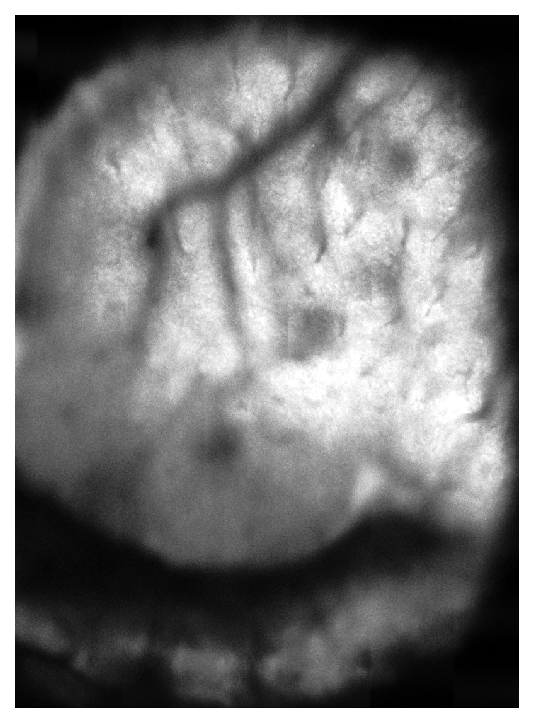

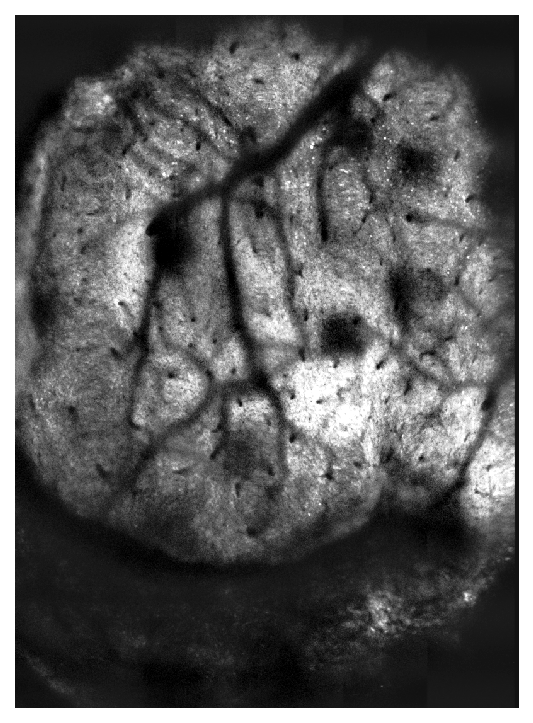

In [26]:
tfu.show_tif(im_full[0,crop[1][0]:crop[1][1], crop[2][0]:crop[2][1]])
tfu.show_tif(im_full[15,crop[1][0]:crop[1][1], crop[2][0]:crop[2][1]])

In [27]:
job.params['conv_filt_type'] = 'gaussian'
job.params['conv_filt_xy'] = 1.0
job.params['conv_filt_z'] = 1.0
job.params['npil_filt_type'] = 'unif'
job.params['npil_filt_xy'] = 8.0
job.params['npil_filt_z']=  1.5
job.params['sdnorm_exp']= 0.8

job.params['intensity_thresh'] : 0.5
job.params['t_batch_size'] = 300
job.params['n_proc_corr'] = 70
job.params['mproc_batchsize'] = 5

In [28]:
mov_crop = mov_full[crop[0][0]:crop[0][1], :, crop[1][0]:crop[1][1], crop[2][0]:crop[2][1]]

In [74]:
# Pick the parameters you want to sweep, and enter them in the tuples.
# It will do all combinations of parameters, so if you have many parameters it will be many combinations! 
job.params['t_batch_size'] = 300
params_to_sweep = {
    'intensity_thresh' : (0.5,),
    'n_svd_comp' : (50,), # if you have multiple values here, make sure you pass mov=svd_info
    'conv_filt_xy': (2.0, 2.5),
    'npil_filt_xy': (11.0,15.0,19.0),
    'conv_filt_z' : (1.5,),
    'npil_filt_z' : (1.0,),
    'sdnorm_exp' : (0.8,0.9)
}

sweep_summary = job.sweep_params(params_to_sweep, mov = mov_crop,testing_dir_tag='sweep-nosvd-2',
                           do_vmap=True, all_combinations=True, n_test_iters = 1)
# use this to access older sweep results
# sweep_summary = n.load(os.path.join(job.dirs['sweep-full'], 'sweep_summary.npy'),allow_pickle=True).item()


      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2 with tag sweep-nosvd-2
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00000 with tag sweep-nosvd-2-comb_00000
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00001 with tag sweep-nosvd-2-comb_00001
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00002 with tag sweep-nosvd-2-comb_00002
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00003 with tag sweep-nosvd-2-comb_00003
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00004 with tag sweep-nosvd-2-comb_00004
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00005 with tag sweep-nosvd-2-comb_00005
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00006 with tag sweep-nosvd-2-comb_00006
      Found 

   Removing mov_sub from /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00003/mov_sub
Running combination 05/12Total Used: 080.150 GB, Virtual Available: 438.706 GB, Virtual Used: 064.490 GB, Swap Used: 015.660 GB
   Summary dict size: 00 GB
      Combination params: comb00004-params-intensity_thresh_0.500-n_svd_comp_50.000-conv_filt_xy_2.000-npil_filt_xy_19.000-conv_filt_z_1.500-npil_filt_z_1.000-sdnorm_exp_0.800
      Saving to tag sweep-nosvd-2-comb_00004 at /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00004
   Saved a copy of params at /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00004
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00004/iters with tag sweep-nosvd-2-comb_00004-iters
   Created dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00004/mov_sub with tag sweep-nosvd-2-comb_00004-mov_sub
   Saving mov

   Removing mov_sub from /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00008/mov_sub
Running combination 10/12Total Used: 080.457 GB, Virtual Available: 438.399 GB, Virtual Used: 064.797 GB, Swap Used: 015.660 GB
   Summary dict size: 00 GB
      Combination params: comb00009-params-intensity_thresh_0.500-n_svd_comp_50.000-conv_filt_xy_2.500-npil_filt_xy_15.000-conv_filt_z_1.500-npil_filt_z_1.000-sdnorm_exp_0.900
      Saving to tag sweep-nosvd-2-comb_00009 at /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00009
   Saved a copy of params at /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00009
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00009/iters with tag sweep-nosvd-2-comb_00009-iters
   Created dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/sweep-nosvd-2/sweep-nosvd-2-comb_00009/mov_sub with tag sweep-nosvd-2-comb_00009-mov_sub
   Saving mov

In [73]:
job.vis_vmap_sweep(sweep_summary)

[1, 1, 3, 4, 1, 1, 3]
(1, 1, 3, 4, 1, 1, 3, 18, 1100, 800)


Viewer(camera=Camera(center=(0.0, 549.5, 399.5), zoom=0.40331818181818185, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=10, ndisplay=2, last_used=9, range=((0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 3.0, 1.0), (0.0, 4.0, 1.0), (0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 3.0, 1.0), (0.0, 18.0, 1.0), (0.0, 1100.0, 1.0), (0.0, 800.0, 1.0)), current_step=(0, 0, 0, 0, 0, 0, 0, 8, 549, 399), order=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), axis_labels=('intensity_thresh', 'n_svd_comp', 'conv_filt_xy', 'npil_filt_xy', 'conv_filt_z', 'npil_filt_z', 'sdnorm_exp', 'z', 'y', 'x')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'mean_img' at 0x7f38d7df0cd0>, <Image layer 'max_img' at 0x7f38d7b18970>, <Image layer 'Corrmap Sweep' at 0x7f38d7d3e160>], help='use <2> for transform', status='Ready', toolti

In [39]:
job.params['conv_filt_xy'] = 2.5
job.params['sdnorm_exp'] = 0.8
job.params['npil_filt_xy'] = 15.0

In [40]:
%%time
# uncomment below to load svd_info for and svd you did earlier if you are re-running this notebook
# svd_info = n.load(os.path.join(job.dirs['svd_cropped'], 'svd_info.npy'), allow_pickle=True).item()
(vmap, mean_img, max_img), __, __ = job.calculate_corr_map(mov = mov_crop)

   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/mov_sub with tag mov_sub
   Saving mov_sub to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/mov_sub
   Using conv_filt: gaussian, 1.50, 2.50
   Using np_filt: unif, 1.00, 15.00
   Created files and dirs for 15 batches
      Running batch 1 of 15
         Will process 300 frames (0-300, t_batch_size: 300)
      Loaded and swapped, idx 0 to 300
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 163.72 seconds
      Saving to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/iters/batch0000
      Running batch 2 of 15
         Will process 300 frames (300-600, t_batch_size: 300)
      Loaded and swapped, idx 300 to 600
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 191.52 seconds
      Saving 

In [41]:
napari.view_image(vmap)

Viewer(camera=Camera(center=(0.0, 549.5, 399.5), zoom=0.419001689760054, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(8.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 18.0, 1.0), (0.0, 1100.0, 1.0), (0.0, 800.0, 1.0)), current_step=(8, 549, 399), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'vmap' at 0x7f3970c260a0>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x7f3a201719d0>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

In [71]:
%%time
job.params['detection_timebin'] = 1 
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 8.5

job.params['activity_thresh'] = 5
job.params['percentile'] = 99.0
job.params['extend_thresh'] = 0.02
job.params['max_iter'] = 10000 # maximum number of ROIs detected in given patch
combined_dir = job.patch_and_detect(combined_name='combined-full', do_patch_idxs=(60,))

   Loading from /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/iters/batch0014
108 blocks with overlap (70 without, 1.54x increase)
108 blocks with overlap (70 without, 1.54x increase)
   Detecting from patch: 60/1
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/detection/patch-0060 with tag patch-0060
   Running cell detection on patch 0060 at /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/detection/patch-0060, max 10000 iters
   Patch bounds are [ 0 18], [534 654], [510 630]
   Cell center bounds are [ 0 18], [549 638], [527 612]
   Time bounds are (None, None)
mov_sub
   Loading 4.13 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/iters/batch0014
      Movie shape: (4279, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/detection/patch-0060
   Loading movie patch to shared memory
   Starting extraction with pe

      Added cell 80 at 13, 553, 560, peak: 15.154, thresh: 5.000, 389 frames, 379 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 17, 619, 570, peak: 15.053, thresh: 5.000, 133 frames, 320 pixels
      Added cell 82 at 11, 618, 599, peak: 15.032, thresh: 5.000, 358 frames, 316 pixels
      Added cell 83 at 03, 562, 539, peak: 15.001, thresh: 5.000, 391 frames, 313 pixels
      Added cell 84 at 17, 616, 536, peak: 14.992, thresh: 5.000, 354 frames, 395 pixels
      Added cell 85 at 17, 575, 595, peak: 14.873, thresh: 5.000, 193 frames, 304 pixels
      Added cell 86 at 11, 555, 603, peak: 14.855, thresh: 5.000, 224 frames, 471 pixels
      Added cell 87 at 13, 574, 564, peak: 14.828, thresh: 5.000, 377 frames, 305 pixels
      Added cell 88 at 15, 631, 540, peak: 14.824, thresh: 5.000, 371 frames, 299 pixels
   Iter 0011: running 08 ROIs in parallel
      Added cell 89 at 11, 581, 570, peak: 14.767, thresh: 5.000, 383 frames, 347 pixels
      Added cell 90 at 07,

      Added cell 167 at 06, 609, 552, peak: 12.023, thresh: 5.000, 200 frames, 429 pixels
      Added cell 168 at 06, 598, 530, peak: 12.008, thresh: 5.000, 248 frames, 373 pixels
   Iter 0021: running 08 ROIs in parallel
      Added cell 169 at 03, 606, 544, peak: 11.976, thresh: 5.000, 263 frames, 306 pixels
      Added cell 170 at 12, 603, 548, peak: 11.920, thresh: 5.000, 260 frames, 343 pixels
      Added cell 171 at 00, 576, 603, peak: 11.907, thresh: 5.000, 241 frames, 325 pixels
      Added cell 172 at 07, 615, 574, peak: 11.902, thresh: 5.000, 251 frames, 406 pixels
      Added cell 173 at 12, 600, 603, peak: 11.879, thresh: 5.000, 240 frames, 400 pixels
      Added cell 174 at 15, 594, 556, peak: 11.857, thresh: 5.000, 248 frames, 386 pixels
      Added cell 175 at 13, 577, 527, peak: 11.807, thresh: 5.000, 239 frames, 366 pixels
      Added cell 176 at 12, 565, 527, peak: 11.786, thresh: 5.000, 258 frames, 414 pixels
   Iter 0022: running 08 ROIs in parallel
      Added cell

      Added cell 255 at 12, 584, 589, peak: 10.472, thresh: 5.000, 177 frames, 342 pixels
      Added cell 256 at 10, 595, 603, peak: 10.458, thresh: 5.000, 232 frames, 305 pixels
   Iter 0032: running 08 ROIs in parallel
      Added cell 257 at 07, 595, 558, peak: 10.427, thresh: 5.000, 157 frames, 372 pixels
      Added cell 258 at 05, 628, 595, peak: 10.422, thresh: 5.000, 199 frames, 342 pixels
      Added cell 259 at 02, 619, 550, peak: 10.391, thresh: 5.000, 225 frames, 367 pixels
      Added cell 260 at 08, 556, 546, peak: 10.389, thresh: 5.000, 169 frames, 438 pixels
      Added cell 261 at 12, 616, 536, peak: 10.374, thresh: 5.000, 178 frames, 381 pixels
      Added cell 262 at 12, 550, 567, peak: 10.373, thresh: 5.000, 161 frames, 333 pixels
      Added cell 263 at 08, 553, 607, peak: 10.364, thresh: 5.000, 157 frames, 377 pixels
      Added cell 264 at 12, 549, 606, peak: 10.362, thresh: 5.000, 195 frames, 415 pixels
   Iter 0033: running 08 ROIs in parallel
      Added cell

      Added cell 343 at 17, 589, 606, peak: 9.531, thresh: 5.000, 143 frames, 348 pixels
      Added cell 344 at 00, 581, 554, peak: 9.522, thresh: 5.000, 177 frames, 357 pixels
   Iter 0043: running 08 ROIs in parallel
      Added cell 345 at 07, 565, 574, peak: 9.521, thresh: 5.000, 165 frames, 357 pixels
      Added cell 346 at 10, 566, 577, peak: 9.505, thresh: 5.000, 193 frames, 435 pixels
      Added cell 347 at 06, 627, 587, peak: 9.501, thresh: 5.000, 177 frames, 427 pixels
      Added cell 348 at 04, 597, 531, peak: 9.492, thresh: 5.000, 183 frames, 395 pixels
      Added cell 349 at 07, 566, 534, peak: 9.477, thresh: 5.000, 155 frames, 361 pixels
      Added cell 350 at 08, 610, 585, peak: 9.476, thresh: 5.000, 146 frames, 485 pixels
      Added cell 351 at 06, 613, 539, peak: 9.472, thresh: 5.000, 171 frames, 345 pixels
      Added cell 352 at 13, 571, 556, peak: 9.465, thresh: 5.000, 143 frames, 345 pixels
   Iter 0044: running 08 ROIs in parallel
      Added cell 353 at 01

      Added cell 432 at 02, 556, 601, peak: 8.802, thresh: 5.000, 175 frames, 320 pixels
   Iter 0054: running 08 ROIs in parallel
      Added cell 433 at 08, 625, 544, peak: 8.813, thresh: 5.000, 150 frames, 362 pixels
      Added cell 434 at 07, 591, 577, peak: 8.796, thresh: 5.000, 136 frames, 399 pixels
      Added cell 435 at 12, 550, 557, peak: 8.795, thresh: 5.000, 145 frames, 434 pixels
      Added cell 436 at 02, 575, 530, peak: 8.789, thresh: 5.000, 160 frames, 343 pixels
      Added cell 437 at 04, 615, 559, peak: 8.788, thresh: 5.000, 148 frames, 417 pixels
      Added cell 438 at 02, 560, 551, peak: 8.785, thresh: 5.000, 176 frames, 364 pixels
      Added cell 439 at 04, 553, 564, peak: 8.784, thresh: 5.000, 156 frames, 364 pixels
      Added cell 440 at 07, 624, 584, peak: 8.781, thresh: 5.000, 153 frames, 402 pixels
   Iter 0055: running 08 ROIs in parallel
      Added cell 441 at 04, 622, 559, peak: 8.771, thresh: 5.000, 170 frames, 334 pixels
      Added cell 442 at 02

In [72]:
outputs = ui.load_outputs(combined_dir, load_traces=False)
v,layers = ui.create_ui(outputs)
ui.add_callbacks_to_ui(v,layers,outputs,savedir=combined_dir)

Found old curated iscell with 3591 of 3591 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/detection/combined-full/iscell_curated_old_29-10-23_20-17-09.npy
Cells
Found old curated + slider-ed iscell with 3591 of 3591 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-AH009_2022-04-04_2-3/detection/combined-full/iscell_curated_slider_old_29-10-23_20-17-09.npy
('vmap_peak', (8.501311, 14.505512428283692), 'peak_val', <function add_curation_sliders.<locals>.<lambda> at 0x7f3378111160>)


In [48]:
job.compute_npil_masks(combined_dir)

'/mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/combined-full'

In [50]:
traces = job.extract_and_deconvolve(stats_dir = combined_dir,mov=mov_crop, crop=None)

   Updated main params file
   Movie shape: (18, 11915, 1150, 950)
72940
   Extracting 72940 valid cells, and saving cell flags to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/combined-full/iscell_extracted.npy
   Extracting activity
Will extract in 24 batches of 500
Saving intermediate results to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/combined-full
Extracting batch 0000 of 0024
Batch size: 36 GB
Extracting batch 0001 of 0024
Batch size: 36 GB
Extracting batch 0002 of 0024
Batch size: 36 GB
Extracting batch 0003 of 0024
Batch size: 36 GB
Extracting batch 0004 of 0024
Batch size: 36 GB
Extracting batch 0005 of 0024
Batch size: 36 GB
Extracting batch 0006 of 0024
Batch size: 36 GB
Extracting batch 0007 of 0024
Batch size: 36 GB
Extracting batch 0008 of 0024
Batch size: 36 GB
Extracting batch 0009 of 0024
Batch size: 36 GB
Extracting batch 0010 of 0024
Batch size: 36 GB
Extracting batch 0011 of 0024
Batch size: 36 GB
Extracting batch 0012 of 0024
Batch size: 36 GB
Extrac

In [96]:
outputs = ui.load_outputs(combined_dir, load_traces=True)
v,layers = ui.create_ui(outputs)
ui.add_callbacks_to_ui(v,layers,outputs,savedir=combined_dir)

Cells
Found old curated + slider-ed iscell with 22418 of 22418 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/detection/combined-full/iscell_curated_slider_old_03-10-23_18-18-38.npy
('vmap_peak', (24.40005, 27.71572265625), 'peak_val', <function add_curation_sliders.<locals>.<lambda> at 0x7f2d41320670>)
